<center>
<img src='https://imgs.xkcd.com/comics/t_distribution_2x.png' align='center' width="800x">
</center>

# Андан на экономе

## Семинар 13:  больше гипотез богу гипотез

In [2]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

## Задание 0 (воспоминания)

Обсудите: 

- Чем непараметрические критерии отличаются от параметрических?
- Что такое $z-$тест и $t-$тест? Какие у них предпосылки? Чем они отличаются друг от друга?
- В каких случаях $z-$тест будет работать плохо?
- В каких случаях $t-$тест будет работать плохо?

Обсудите:

- Что такое критерии знаков? 
- Какие у них предпосылки? 
- Как выглядит нулевая гипотеза? 
- Как выглядит формула для подсчёта критерия?

Обсудите:

- Какие прдпосылки есть у теста Манна-Уитни? 
- Как выглядит проверяемая нулевая гипотеза? 
- Как выглядит формула для подсчёта критерия?
- В каких случаях тест Манна-Уитни будет работать плохо?

Если забыли, то вот вам реклама лекций Фила (опять): 

- [Видосы с курсеры](https://www.youtube.com/watch?v=2p24KPez62U&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L)
- [Лекция про непараметрические критерии из ФКНовской магистратуры](https://www.youtube.com/watch?v=0Rn6ImS0WK4)

## Задание 1 (мудрость)

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы лайкать. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

В табличке `df_vk_wise` лежат данные о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено, и будем работать с остатками. 

In [3]:
df = pd.read_csv('df_vk_wise.csv')[50:]
df.head()

,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


Постройте гистограмму для числа лайков постов, содержащих личные местоимения и не содержащих. Как думаете, есть ли с распределением лайков какие-то проблемы?

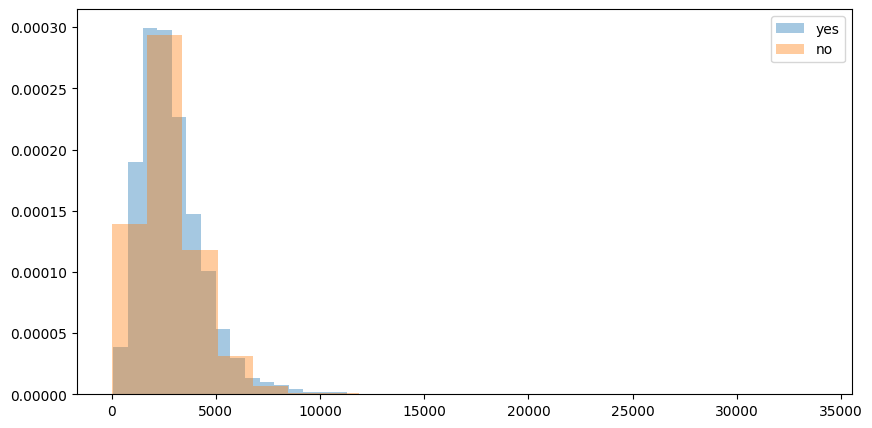

In [4]:
x = df[df['I']== True]['likes'].values
y = df[df['I']== False]['likes'].values

plt.figure(figsize=(10,5))
plt.hist(x, bins=20, density=True, alpha=0.4, label='yes')
plt.hist(y, bins=20, density=True, alpha=0.4, label='no')
plt.legend();

Да, проблемы есть. Это выбросы. Хвосты на гистограммах оказываются очень длинными. Найдите медианы и средние для числа лайков. Сравните их между собой. 

In [5]:
print(np.mean(x), np.median(x))
print(np.mean(y), np.median(y))

2879.1828885400314 2588.5
2784.0432051478474 2497.0


Проверьте гипотезу о равенстве среднего числа лайков. Используйте для этого $z$-тест, основанный на ЦПТ. Дисперсию расчитывайте по выборке, используя несмещённую оценку `(ddof=1)`. Запишите наблюдаемое значение статистики в переменную `z_obs`. 

In [6]:
alpha = 0.05 

diff = x.mean() - y.mean() 
diff_std = np.sqrt(x.var(ddof=1)/x.size + y.var(ddof=1)/y.size)
z_obs = diff/diff_std
z_obs

2.6644610922505323

Найдите критическое значение статистики. Сравните его с наблюдаемым. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Критическое значение статистики запишите в переменную `z_crit`, а p-значение в переменную `pval`. 

In [7]:
z_crit = sts.norm.ppf(1 - alpha/2)
pval = 2*sts.norm.cdf(-z_obs)
z_crit, pval

(1.959963984540054, 0.00771117860544288)

Можно заметить, что у распределения числа репостов длинные хвосты. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае использовать другой критерий. Например, критерий Манна-Уитни.

Найдите наблюдаемое значение статистики Манна-Уитни. Сравните его с критическим. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Отличается ли полученный вывод от вывода $z$-теста?

In [8]:
U, pval = sts.mannwhitneyu(x, y, alternative='two-sided')
U

8604129.5

In [9]:
pval

0.01004067464288777

Значение статистики можно найти через ранги.

In [10]:
xy = np.concatenate((x,y))

# нашли ранги и дальше просуммировали
R1 = sts.rankdata(xy)[:len(x)]
R1.sum(axis=-1) - len(x)*(len(x) + 1)/2

8604129.5

In [11]:
from collections import Counter

# ранги быввают дробные, когда равенства :)
Counter(R1).most_common()[:3]

[(3908.5, 7), (3387.5, 5), (1640.0, 4)]

Можно посчитать значение статистики циклом, сравнивая между собой элементы.

In [12]:
U = 0

for item in x:
    for jtem in y:
        U += (item > jtem)
        U += 0.5*(item == jtem) # половинка (прям как в roc-auc)
U

8604129.5

## Задание 2 (ломаем тест Манна-Уитни)

Придумайте пример, на котором тест Манна-Уитни не будет работать. 

__Hint:__ Главная предпосылка теста заключается в том, что распределение не меняется, но у него происходит сдвиг. Воспользуйтесь этим. 

\begin{equation*}
    \begin{aligned}
    & H_0: F_X(x) = F_Y(y) \\
    & H_A: F_X(x) = F_Y(y + m), m \ne 0
    \end{aligned}
\end{equation*}


<center>
<img src='https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/sem12_more_ab/mw.png' align='center' width="300x">
</center>


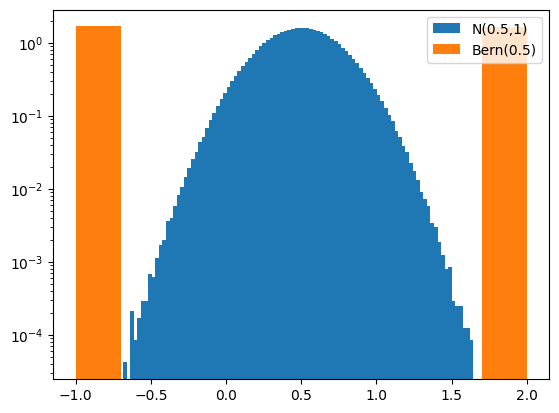

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as sts

n_obs = 10**6
x = sts.norm(0.5, 0.25).rvs(n_obs)
y = 3*sts.bernoulli(0.5).rvs(n_obs) - 1

# В результате АБ-теста произошла поляризация мнений!

plt.hist(x, bins=100, density=True, label='N(0.5,1)');
plt.hist(y, density=True, label='Bern(0.5)', log=True);
plt.legend();

In [14]:
# Тест Манна-Уитни говорит, что изменений нет, хотя они, очевидно, есть :(
_, pval = sts.mannwhitneyu(x, y, alternative='two-sided')
pval

0.3769755562151268

In [15]:
# А вот тест Колмогорова-Смирнова заметит изменения :) 
# Сможете объяснить почему? 
sts.ks_2samp(x, y)

KstestResult(statistic=0.500355, pvalue=0.0, statistic_location=-1.0, statistic_sign=-1)

## Задание 3 (мимимишные мышки)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом. 

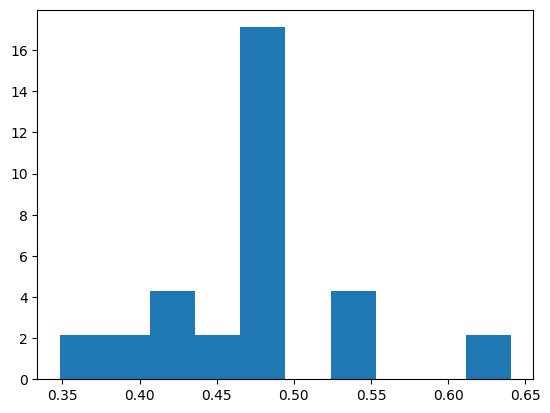

In [16]:
x = pd.read_csv('mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение. 

In [17]:
from statsmodels.stats.descriptivestats import sign_test
_, pvalue_1 = sign_test(x, mu0=0.5)
pvalue_1

0.021270751953125

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение. 

In [18]:
from statsmodels.stats.descriptivestats import sign_test
_, pvalue_2 = sts.wilcoxon(x - 0.5)
pvalue_2

0.09344482421875

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение. 

In [19]:
from statsmodels.stats.weightstats import ztest,zconfint

_, pvalue_3 = ztest(x, value=0.5)
pvalue_3, x.mean()

(0.13460721078205806, 0.47528889375)

## Задание 4 (парадокс Симпсона)

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований: 

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$, 
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы: 

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин? 
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство. 

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона.

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__  Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин?  Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

> __Ответ:__ Заметим, что среди принимавших лекарство мужчин доля выздоровевших больше, чем среди мужчин, не принимавших лекарство:$$\frac{770}{770 + 880} \approx 0.467 \qquad > \qquad 0.395 \approx \frac{88}{88 + 135}.$$

Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [20]:
men = np.array([[770,880],[88,135]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [21]:
sts.chi2_contingency(men, correction=False)

Chi2ContingencyResult(statistic=4.107854906463222, pvalue=0.04268446899604581, dof=1, expected_freq=array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]]))

__б)__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`. 

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [22]:
n = np.sum(men)

Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [23]:
n1, n2 = np.sum(men, axis=1)

Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [24]:
p = np.sum(men, axis=0) / n

Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [25]:
expect_men = np.array([p * n1, p * n2])

In [26]:
expect_men

array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [27]:
statistic = np.sum((men - expect_men) ** 2 / expect_men)

In [28]:
statistic

4.107854906463222

In [29]:
pvalue = 1-sts.chi2.cdf(statistic, df=1)

In [30]:
pvalue

0.04268446899604583

__в)__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а) 

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

> __Ответ:__ Заметим, что среди принимавших лекарство женщин доля выздоровевших больше, чем среди женщин, не принимавших лекарство:$$\frac{165}{165 + 80} \approx 0.673 \qquad > \qquad 0.587 \approx \frac{440}{440 + 310}.$$

Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [31]:
women = np.array([[165,80],[440,310]]) 

In [32]:
sts.chi2_contingency(women, correction=False)

Chi2ContingencyResult(statistic=5.838444095586957, pvalue=0.015679686056826774, dof=1, expected_freq=array([[148.96984925,  96.03015075],
       [456.03015075, 293.96984925]]))

__г)__ Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [33]:
both = men + women
sts.chi2_contingency(both, correction=False)

Chi2ContingencyResult(statistic=6.239588767305169, pvalue=0.012492547994073244, dof=1, expected_freq=array([[966.66143654, 928.33856346],
       [496.33856346, 476.66143654]]))

__д)__  Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

> __Ответ:__ Как это ни странно, из таблицы с объединенными результатами следует, что доля выздоровевших больше среди тех людей, которые лекарство **не принимали** и этот результат значимый:

$$\frac{935}{935+960} \approx 0.493 \qquad < \qquad 0.542 \approx \frac{528}{528+445}.$$

## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде. 

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.